# SGD Regression

Applying the Stochastic Gradient Descent (SGD) method to the linear classifier or regressor provides the efficient estimator for classification and regression problems.

In [1]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [2]:
x, y = make_regression(n_samples=1000, n_features=30)
print(x[0:2])
print(y[0:2])

x = scale(x)
y = scale(y)

[[ 0.85185008 -0.10663118 -0.69322769 -0.35289782 -2.62529607 -0.63968093
  -0.91435536 -0.7184486   0.01695937 -0.99339223  0.93757994  0.58516103
  -0.43701586 -0.47540745 -0.78136467 -2.12218924 -0.65517146  0.36808147
   0.44012558 -0.35887602 -2.36783348 -1.27882803  0.45667017  0.30666057
  -0.03513174 -0.63668089  2.20482933  0.28467687 -1.53922861 -0.64384909]
 [ 0.21207844  1.80231268 -1.46295644 -1.96364564 -0.45778297 -0.84882141
   0.53547731 -0.0947549   0.4296831   1.3316201  -0.48452786 -0.31279441
  -0.10848302 -0.07653964 -0.81615937 -0.81904207  0.18690506  1.82758948
  -1.01742382 -0.53743474  0.92397879 -0.3463996   1.10794106 -2.0551667
   0.30544253  1.47334492  0.33624146  0.32175225 -2.16818906  1.05199481]]
[ 71.92626947 -23.35998556]


In [3]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.15)

In [4]:
sgdr = SGDRegressor()

In [5]:
sgdr.fit(xtrain, ytrain)

score = sgdr.score(xtrain, ytrain)
score

0.999999947627322

In [6]:
cv_score = cross_val_score(sgdr, x, y, cv=10)
cv_score

array([0.99999995, 0.99999994, 0.99999995, 0.99999992, 0.99999994,
       0.99999991, 0.99999995, 0.99999993, 0.99999997, 0.99999997])

In [7]:
ypred = sgdr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
mse
rmse = mse**(1/2.0)

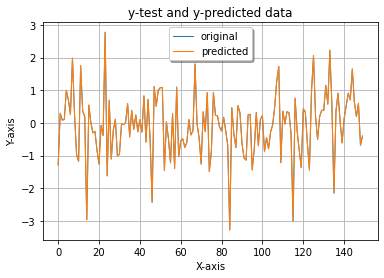

In [8]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9]:
boston = load_boston()
x, y = boston.data, boston.target

x = scale(x)
y = scale(y)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.15)

sgdr = SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty='elasticnet')
sgdr.fit(xtrain, ytrain)

score = sgdr.score(xtrain, ytrain)
score

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

0.7259878052715059

In [10]:
ypred = sgdr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
mse

0.2433540348781722

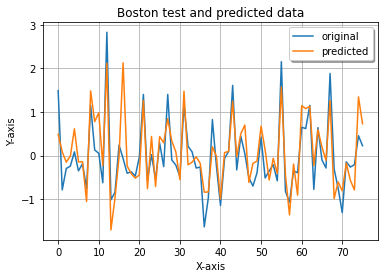

In [11]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()